# GRAPE calculation of control fields for cnot implementation

[This is an updated implementation based on the deprecated notebook of GRAPE CNOT implementation by Robert Johansson](https://nbviewer.org/github/qutip/qutip-notebooks/blob/master/examples/control-grape-cnot.ipynb)

In [3]:
# pip install qutip_qtrl

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt
# the library for quantum control
import qutip_qtrl.pulseoptim as cpo

In [5]:
# total duration
T = 2 * np.pi
# number of time steps
times = np.linspace(0, T, 500)

In [6]:
U_0 = qt.operators.identity(4)
U_target = qt.core.gates.cnot()

### Starting Point

In [7]:
U_0

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dia, isherm=True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

### Target Operator

In [8]:
U_target

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

In [9]:
# Drift Hamiltonian
g = 0
H_drift = g * (
    qt.tensor(qt.sigmax(), qt.sigmax()) + qt.tensor(qt.sigmay(), qt.sigmay())
)

H_drift

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

In [10]:
H_ctrl = [
    qt.tensor(qt.sigmax(), qt.identity(2)),
    qt.tensor(qt.sigmay(), qt.identity(2)),
    qt.tensor(qt.sigmaz(), qt.identity(2)),
    qt.tensor(qt.identity(2), qt.sigmax()),
    qt.tensor(qt.identity(2), qt.sigmay()),
    qt.tensor(qt.identity(2), qt.sigmaz()),
    qt.tensor(qt.sigmax(), qt.sigmax()),
    qt.tensor(qt.sigmay(), qt.sigmay()),
    qt.tensor(qt.sigmaz(), qt.sigmaz()),
]

In [11]:
H_labels = [
    r"$u_{1x}$",
    r"$u_{1y}$",
    r"$u_{1z}$",
    r"$u_{2x}$",
    r"$u_{2y}$",
    r"$u_{2z}$",
    r"$u_{xx}$",
    r"$u_{yy}$",
    r"$u_{zz}$",
]

In [12]:
H_ctrl

[Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
 Qobj data =
 [[0. 0. 1. 0.]
  [0. 0. 0. 1.]
  [1. 0. 0. 0.]
  [0. 1. 0. 0.]],
 Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
 Qobj data =
 [[0.+0.j 0.+0.j 0.-1.j 0.+0.j]
  [0.+0.j 0.+0.j 0.+0.j 0.-1.j]
  [0.+1.j 0.+0.j 0.+0.j 0.+0.j]
  [0.+0.j 0.+1.j 0.+0.j 0.+0.j]],
 Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
 Qobj data =
 [[ 1.  0.  0.  0.]
  [ 0.  1.  0.  0.]
  [ 0.  0. -1.  0.]
  [ 0.  0.  0. -1.]],
 Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
 Qobj data =
 [[0. 1. 0. 0.]
  [1. 0. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]],
 Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
 Qobj data =
 [[0.+0.j 0.-1.j 0.+0.j 0.+0.j]
  [0.+1.j 0.+0.j 0.+0.j 0.+0.j]
  [0.+0.j 0.+0.j 0.+0.j 0.-1.j]
  [0.+0.j 0.+0.j 0.+1.j 0.+0.j]],
 Quantum ob

## GRAPE

In [ ]:
result = cpo.optimize_pulse_unitary(
    H_drift,
    H_ctrl,
    U_0,
    U_target,
    num_tslots=500,
    evo_time=(2 * np.pi),
    amp_lbound=-(2 * np.pi * 0.05),
    amp_ubound=(2 * np.pi * 0.05),
    fid_err_targ=1e-9,
    max_iter=500,
    max_wall_time=60,
    alg="GRAPE",
    optim_method="FMIN_L_BFGS_B",
    method_params={
        "disp": True,
        "maxiter": 1000,
    },
)

In [14]:
for attr in dir(result):
    if not attr.startswith("_"):
        print(f"{attr}: {getattr(result, attr)}")

print(np.shape(result.final_amps))

evo_full_final: Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 7.07106241e-01+7.07107320e-01j  1.63073725e-05+2.86216718e-06j
   9.69535521e-07+2.29237819e-05j  2.43200264e-05-1.83909215e-05j]
 [-2.86260894e-06-1.63070825e-05j  7.07109568e-01+7.07103994e-01j
   1.82405732e-05+1.34356635e-05j -7.87486022e-06+3.10636368e-06j]
 [ 1.83912044e-05-2.43203016e-05j -3.10602464e-06+7.87448467e-06j
  -1.19486339e-05-2.83691964e-06j  7.07109646e-01+7.07103915e-01j]
 [-2.29234165e-05-9.69479544e-07j -1.34360067e-05-1.82403503e-05j
   7.07101668e-01+7.07111894e-01j  2.83694321e-06+1.19492883e-05j]]
evo_full_initial: Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 9.95536283e-01+0.02394284j  2.50686391e-02-0.04369827j
  -2.34129064e-02+0.00304966j  1.53623793e-03-0.07236332j]
 [-1.55350897e-02-0.04405989j  9.80449333e-01+0.18020023j
  -4.67654956e-05+0.05193393j -3.67636557e-02+0.00395817j]
 [ 

## Plot control fields for cnot gate in the presense of single-qubit tunnelling

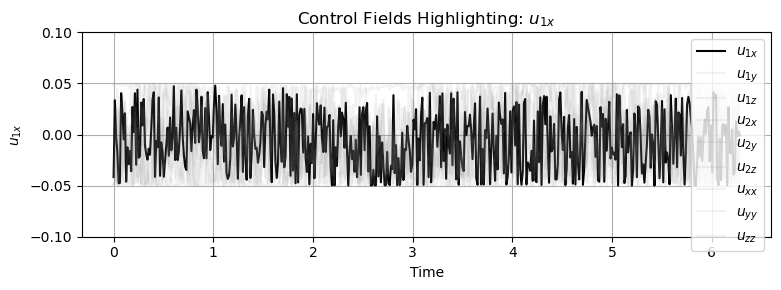

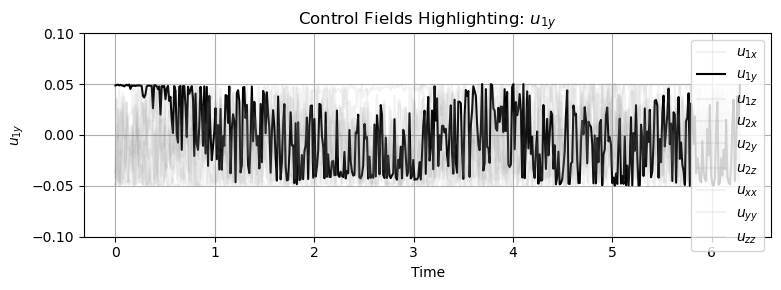

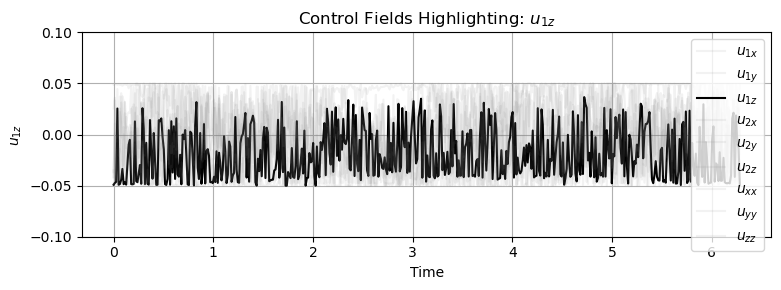

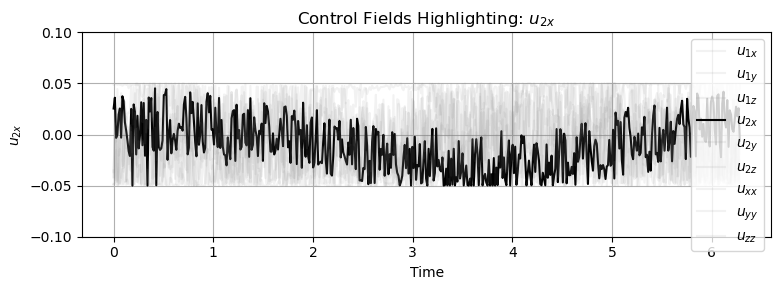

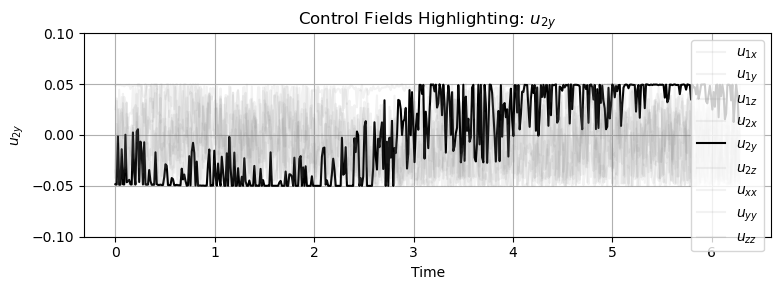

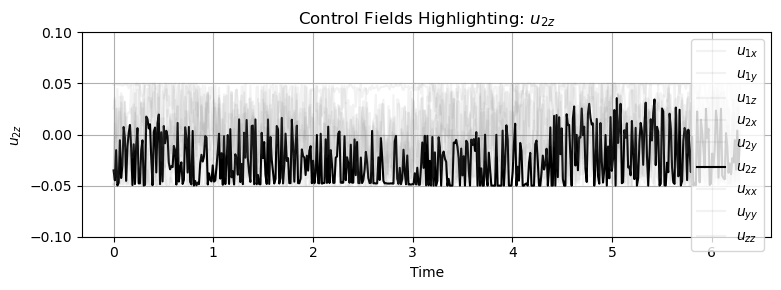

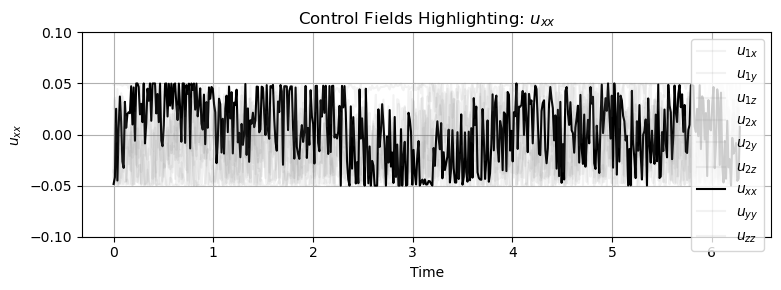

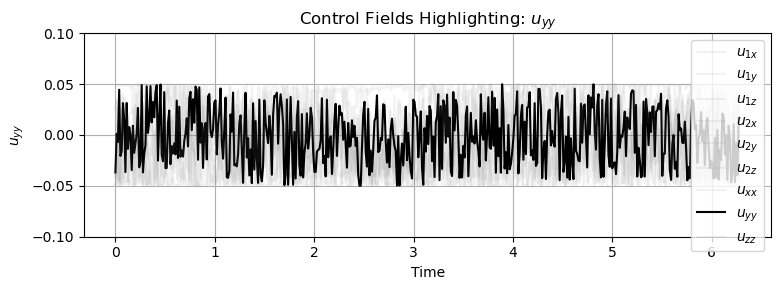

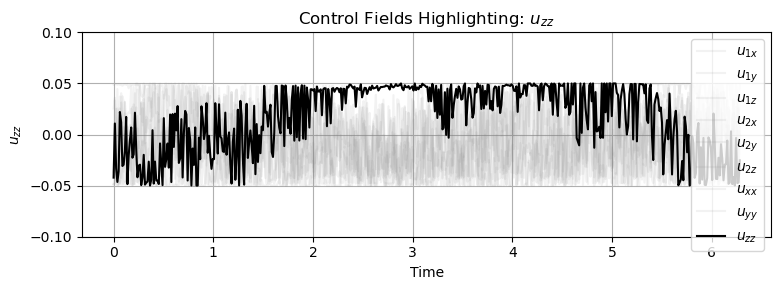

In [ ]:
def plot_control_amplitudes(times, final_amps, labels):
    num_controls = final_amps.shape[1]

    y_max = 0.1  # Fixed y-axis scale for viewability
    y_min = -0.1

    for i in range(num_controls):
        fig, ax = plt.subplots(figsize=(8, 3))

        for j in range(num_controls):
            color = "black" if i == j else "gray"
            alpha = 1.0 if i == j else 0.1
            ax.plot(
                times,
                final_amps[:, j],
                label=labels[j],
                color=color,
                alpha=alpha
                )
        ax.set_title(f"Control Fields Highlighting: {labels[i]}")
        ax.set_xlabel("Time")
        ax.set_ylabel(labels[i])
        ax.set_ylim(y_min, y_max)  
        ax.grid(True)
        ax.legend()
        plt.tight_layout()
        plt.show()


plot_control_amplitudes(times, result.final_amps / (2 * np.pi), H_labels)

## Fidelity/overlap

In [16]:
U_target

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

In [17]:
U_f = result.evo_full_final
U_f.dims = [[2, 2], [2, 2]]

In [18]:
U_f

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 7.07106241e-01+7.07107320e-01j  1.63073725e-05+2.86216718e-06j
   9.69535521e-07+2.29237819e-05j  2.43200264e-05-1.83909215e-05j]
 [-2.86260894e-06-1.63070825e-05j  7.07109568e-01+7.07103994e-01j
   1.82405732e-05+1.34356635e-05j -7.87486022e-06+3.10636368e-06j]
 [ 1.83912044e-05-2.43203016e-05j -3.10602464e-06+7.87448467e-06j
  -1.19486339e-05-2.83691964e-06j  7.07109646e-01+7.07103915e-01j]
 [-2.29234165e-05-9.69479544e-07j -1.34360067e-05-1.82403503e-05j
   7.07101668e-01+7.07111894e-01j  2.83694321e-06+1.19492883e-05j]]

In [19]:
print(f"Fidelity: {qt.process_fidelity(U_f, U_target)}")

Fidelity: 0.9999999987458097


## Process tomography

Quantum Process Tomography (QPT) is a technique used to characterize an unknown quantum operation by reconstructing its process matrix (also called the χ (chi) matrix). This matrix describes how an input quantum state is transformed by the operation.

Defines the basis operators 
{
𝐼
,
𝑋
,
𝑌
,
𝑍
}
for the two-qubit system.

These operators form a complete basis to describe any quantum operation in the Pauli basis.

### Ideal cnot gate

In [20]:
op_basis = [[qt.qeye(2), qt.sigmax(), qt.sigmay(), qt.sigmaz()]] * 2
op_label = [["i", "x", "y", "z"]] * 2

U_target is the ideal CNOT gate.

qt.to_super(U_target) converts it into superoperator form, which is necessary for QPT.

qt.qpt(U_i_s, op_basis) computes the χ matrix for the ideal gate.

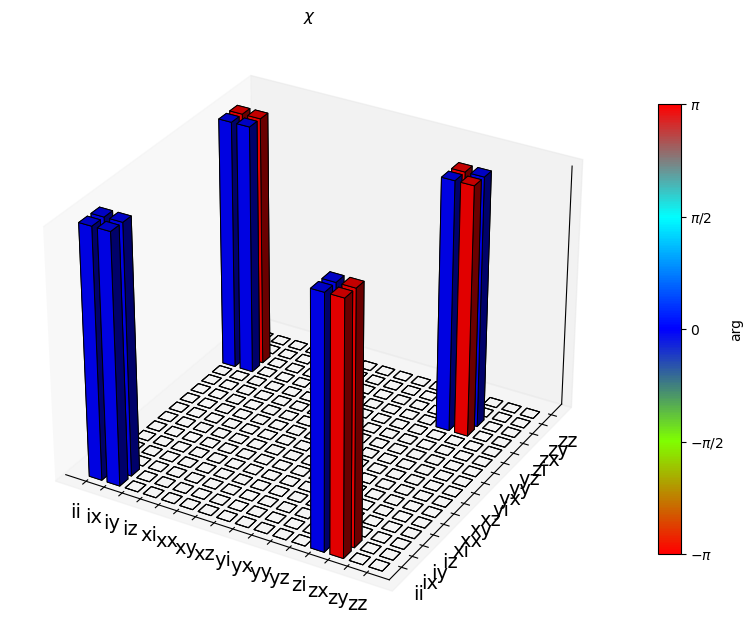

In [21]:
fig = plt.figure(figsize=(12, 6))

U_i_s = qt.to_super(U_target)

chi = qt.qpt(U_i_s, op_basis)

fig = qt.qpt_plot_combined(chi, op_label, fig=fig, threshold=0.001)

In [22]:
op_basis = [[qt.qeye(2), qt.sigmax(), qt.sigmay(), qt.sigmaz()]] * 2
op_label = [["i", "x", "y", "z"]] * 2

op_label

[['i', 'x', 'y', 'z'], ['i', 'x', 'y', 'z']]

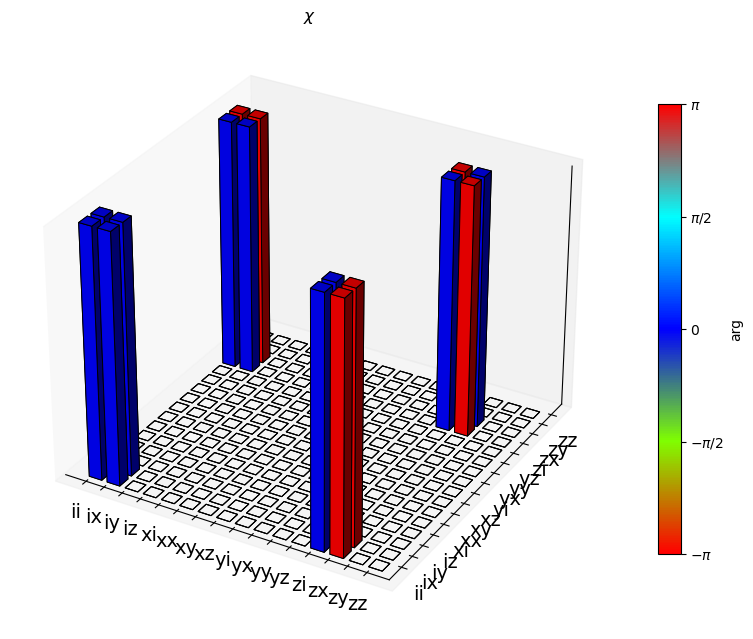

In [23]:
fig = plt.figure(figsize=(12, 6))

U_f_s = qt.to_super(U_f)

chi = qt.qpt(U_f_s, op_basis)

fig = qt.qpt_plot_combined(chi, op_label, fig=fig, threshold=0.01)